In [7]:
# 데이터 전처리 과정

In [8]:
import pandas as pd
import os

eco_file = path + "\ECOS_TABLE_20210118_154159.xlsx"
ex_eco = pd.read_excel(eco_file, engine='openpyxl')
ex_eco

corona_file = path +"/101_DT_COVID19_005_D_20210118235058.xlsx"
ex_corona = pd.read_excel(corona_file, engine='openpyxl')
ex_corona

,○ 코로나 19 발생현황 (국내 - 일) [],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296
0,구분별,상태별,항목,단위,2020. 04. 01,2020. 04. 02,2020. 04. 03,2020. 04. 04,2020. 04. 05,2020. 04. 06,...,2021. 01. 09,2021. 01. 10,2021. 01. 11,2021. 01. 12,2021. 01. 13,2021. 01. 14,2021. 01. 15,2021. 01. 16,2021. 01. 17,2021. 01. 18
1,전체,해외유입,인원,명,NaN,NaN,NaN,NaN,NaN,NaN,...,45,34,32,29,26,28,29,33,20,23
2,전체,국내발생,인원,명,NaN,NaN,NaN,NaN,NaN,NaN,...,596,631,419,508,536,496,484,547,500,366
3,전체,신규,인원,명,101,89,86,94,81,47,...,641,665,451,537,562,524,513,580,520,389
4,전체,누적,인원,명,9887,9976,10062,10156,10237,10284,...,67999,68664,69114,69651,70212,70728,71241,71820,72340,72729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,검역,누적,인원,명,NaN,NaN,NaN,NaN,NaN,NaN,...,848,862,873,881,877,714,716,721,728,721
231,검역,신규,인원,명,NaN,1,0,0,1,0,...,0,0,0,0,7,174,3,3,1,17
232,검역,누적,인원,명,0,1,1,1,2,2,...,1682,1682,1682,1682,1689,1863,1866,1869,1870,1887
233,검역,신규,인원,명,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#전처리 과정 Corona주말 데이터를 Kospi주말 데이터 삭제

In [5]:
import pandas as pd
import numpy as np
import os

path = os.getcwd()

eco_file = path + "\ECOS_TABLE_20210118_154159.xlsx"
corona_file = path +"/101_DT_COVID19_005_D_20210118235058.xlsx"
pd_economic = pd.DataFrame()

#4월 1일부터 1월15일 data
ex_eco = pd.read_excel(eco_file, engine='openpyxl')
dates = np.array(ex_eco.columns[66:])
df_kospi = pd.DataFrame(data=dates, columns=['Date'])
kospi_value = np.array(ex_eco.loc[0])
kospi_value = kospi_value[66:]

df_kospi['Kospi'] = kospi_value

ex_corona = pd.read_excel(corona_file, engine='openpyxl')
corona_dates = np.array(ex_corona.iloc[0])[4:]
corona_date = []
for each in corona_dates:
    string = each.replace(". ", "/")
    corona_date.append(string)

df_corona = pd.DataFrame(data=corona_date, columns=['Date'])
corona_value = np.array(ex_corona.iloc[3])
corona_value = corona_value[4:]
df_corona['Coronic'] = corona_value

df = pd.merge(df_corona, df_kospi, left_on='Date', right_on='Date', how='outer')

df.to_excel(path+"\kospi_corona.xlsx", index=False, engine='openpyxl')

df = pd.read_excel(path+"\kospi_corona.xlsx", engine='openpyxl')

df.dropna()

df

           Date  Coronic    Kospi
0    2020/04/01      101  1685.46
1    2020/04/02       89  1724.86
2    2020/04/03       86  1725.44
3    2020/04/04       94      NaN
4    2020/04/05       81      NaN
..          ...      ...      ...
288  2021/01/14      524  3149.93
289  2021/01/15      513  3085.90
290  2021/01/16      580      NaN
291  2021/01/17      520      NaN
292  2021/01/18      389      NaN

[293 rows x 3 columns]


In [9]:
#bar 차트

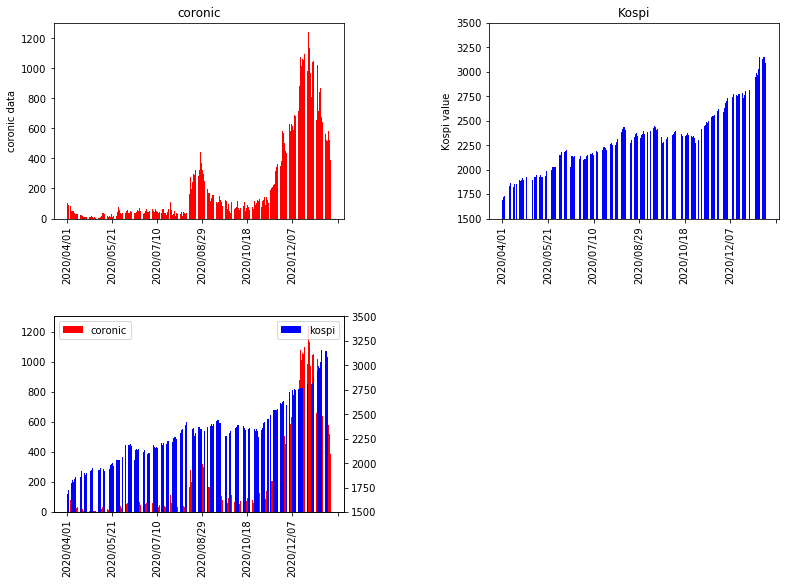

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Date_list = df['Date'].tolist()
X_pos = np.arange(len(Date_list))
Coronic_Value = df['Coronic'].tolist()
Kospi_Value = df['Kospi'].tolist()

plt.figure(figsize=(13, 9))

plt_Corona = plt.subplot(2,2,1)
plt_Corona.bar(Date_list, Coronic_Value, align='center', color='r')
plt_Corona.tick_params(axis='x', rotation=90)
plt_Corona.set_title('coronic')
plt_Corona.set_ylabel('coronic data')
plt_Corona.xaxis.set_major_locator(ticker.AutoLocator())

plt_Kospi = plt.subplot(2,2,2)
plt_Kospi.tick_params(axis='x', rotation=90)
plt_Kospi.bar(Date_list, Kospi_Value, align='center', color='b')
plt_Kospi.set_title('Kospi')
plt_Kospi.set_ylabel('Kospi value')
plt_Kospi.set_ylim(1500,3500)
plt_Kospi.xaxis.set_major_locator(ticker.AutoLocator())
# plt_Kospi.set_xticklabels(Date_list, rotation=90)

plt_df1 = plt.subplot(2,2,3)
plt_df1.tick_params(axis='x', rotation=90)
plt_df2 = plt_df1.twinx()
plt_df1.bar(Date_list, Coronic_Value, align='center', color='r', label='coronic')
plt_df2.bar(Date_list, Kospi_Value, align='center', color='b', label='kospi')
plt_df2.set_ylim(1500,3500)
plt_df1.legend(loc='upper left')
plt_df2.legend(loc='upper right')
plt_df1.xaxis.set_major_locator(ticker.AutoLocator())

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [11]:
#time & Scatter Graph

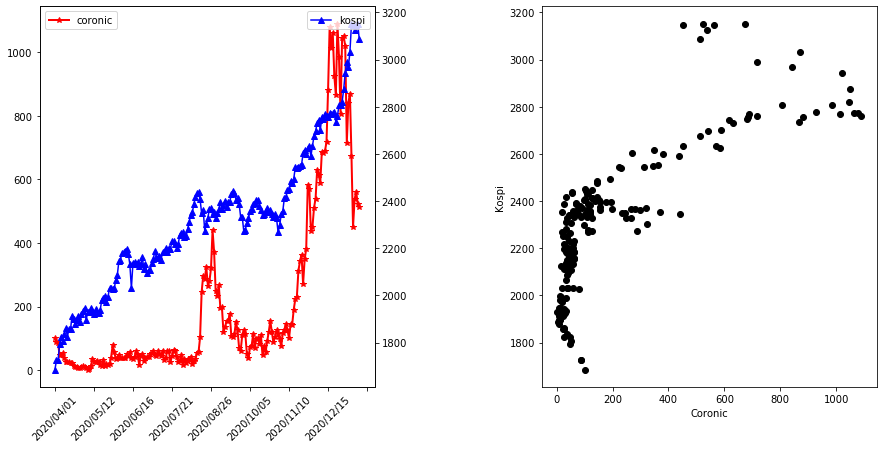

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os

path = os.getcwd()

df = pd.read_excel(path+"\kospi_corona.xlsx", engine='openpyxl')
df = df.dropna()

x_pos = np.arange(len(df['Date']))
plt.figure(figsize=(15, 7))
plt_Coronic = plt.subplot(1,2,1)
plt_Kospi = plt_Coronic.twinx()

plt_Kospi.plot(df['Date'], df['Kospi'], color='b', marker='^', label='kospi')
plt_Coronic.plot(df['Date'], df['Coronic'], color='r', marker='*', linewidth=2, label='coronic')
plt_Coronic.xaxis.set_major_locator(ticker.AutoLocator())
plt_Coronic.tick_params(axis='x', which='major', rotation=45)
# plt_Coronic.set_xticklabels(df['Date'], rotation=90, minor=False)
plt_Coronic.legend(loc='upper left')
plt_Kospi.legend(loc='upper right')

plt_corr = plt.subplot(1,2,2)
plt_corr.scatter(x=df['Coronic'], y=df['Kospi'], color='black')
plt_corr.set_ylabel('Kospi')
plt_corr.set_xlabel('Coronic')

plt.subplots_adjust(wspace=0.5)
plt.show()

In [13]:
#인스타그램 crawling 1000건의 #코로나 검색

In [ ]:
from selenium import webdriver
import time
import timeit
import os

path = os.getcwd()

driver = webdriver.Chrome(path+"\chromedriver.exe")
driver.get('https://www.instagram.com')
time.sleep(2)

def login(id, password):
    email = id
    input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
    input_id.clear()
    input_id.send_keys(email)

    password = password
    input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
    input_pw.clear()
    input_pw.send_keys(password)
    input_pw.submit()
    time.sleep(5)
login('','')

def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    driver.get(url)
word = '코로나'
insta_searching(word)
time.sleep(5)

def select_first(driver):
    first = driver.find_elements_by_css_selector('div._9AhH0')[0]
    first.click()
select_first(driver)
time.sleep(3)

import re
from bs4 import BeautifulSoup
import unicodedata

def get_content(driver):

    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    try:
        content = soup.select('div.C4VMK > span')[0].text #내용
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '

    tags = re.findall(r'#[^\s#,\\d]+', content)

    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    try:
        like = soup.select_one('article > div.eo2As > section.EDfFK.ygqzn > div > div > button').text
    except:
        like = soup.select_one(
            'article > div.eo2As > section.EDfFK.ygqzn > div > span').text

    try:
        place = soup.select(
            'body > div._2dDPU.CkGkG > div.zZYga > div > article > header > div.o-MQd > div.M30cS > div.JF9hh > a')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''

    data = [content, date, like, place, tags]
    return data
get_content(driver)


def move_next(driver):
    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(4)
move_next(driver)

results = []
crawling_pages = 10
error_num = 0
start = timeit.default_timer()
for i in range(crawling_pages):

    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
        print(i)
    except:
        error_num = error_num + 1
        print('error: %d' % error_num)
        time.sleep(5)
        move_next(driver)

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content','data','like','place','tags']
results_df.to_excel(path+'\crawling_Corona2.xlsx', engine='openpyxl')
end = timeit.default_timer()
print("end time: ", end)
print("time took: ", end - start)

In [15]:
pd.read_excel(path+'\crawling_Corona.xlsx', engine='openpyxl')

,Unnamed: 0,content,data,like,place,tags
0,0,속눈썹 왜이래???,2021-01-22,좋아요 286개,NaN,[]
1,1,입술색 청순하게 발라봤어.,2021-01-20,좋아요 218개,방구석,[]
2,2,아무리 노력해도 '코로나 사망자' 끝없이 나오자 영안실서 눈물 흘린 의료진#의료진 ...,2021-01-21,"좋아요 5,106개",NaN,"['#의료진', '#코로나', '#코로나사망자', '#거리두기']"
3,3,이 사진 스토리에 여러번 올려서 살짝 지겹지만 다들 이쁘다 해줬으니까 피드에 올릴랭...,2021-01-22,좋아요 116개,NaN,"['#코로나', '#그만']"
4,4,오늘은 편하게 후리스로😊....#남친룩 #데일리룩 #데일리룩코디 #미니멀룩 #미니멀...,2021-01-22,좋아요 135개,NaN,"['#남친룩', '#데일리룩', '#데일리룩코디', '#미니멀룩', '#미니멀', ..."
...,...,...,...,...,...,...
994,994,▼ INCOBB YOUTUBE CHANNEL ▼⠀👉🏻 www.youtube.com/...,2021-01-22,좋아요 19개,NaN,"['#인코브', '#INCOBB', '#INCOBBKOREA', '#DOORSCUF..."
995,995,📊코로나 실시간 현황 1/22 코로나19 확산세가 한결 누그러지면서 22일 신규 확...,2021-01-22,좋아요 3개,터닝포인트짐&필라테스 연수점,"['#터닝포인트짐', '#코로나', '#코로나19', '#코로나확진자', '#코로나..."
996,996,변경된 시간으로 정상영업 중입니다🤗........#버킷리스트 #사회적거리두기 #코로...,2021-01-22,좋아요 4개,NaN,"['#버킷리스트', '#사회적거리두기', '#코로나', '#영업시간', '#코로나조..."
997,997,"😷벌써 코로나와 싸운지 1년 째😷검사 수와 마스크 착용, 거리두기 이행률이 높다는 ...",2021-01-22,좋아요 5개,NaN,"['#의료진덕분에', '#질병관리청', '#메디컬tv', '#메디컬티비', '#me..."


In [ ]:
#인스타 크롤링 데이터 전처리 과정

In [19]:
import pandas as pd
import os

path = os.getcwd()
file_name = "\crawling_Corona.xlsx"
file_directory = path + file_name

df = pd.read_excel(file_directory, engine='openpyxl')

tags_total = []
for tags in df['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

from collections import Counter

stopwords = ['', '#맞팔', '#좋아요', '#일상', '#선팔', '#좋반', '#소통', '#좋아요반사', '#follow', '#데일리',
             '#instagoo', '#팔로우', '#선팔하면맞팔', '#선팔맞팔', '#인친', '#첫줄', '#팔로우늘리기', '#일상스타그램', '#얼스타그램',
             '#팔로워', '#셀피', '#첫줄반사', '#협찬', '#selfie', '#맛스타그램', '#좋아요테러', '#좋테', '#팔로워판매', '#좋아요판매',
             '#팔로워구매', '#소개계정맞팔', '#셀스타그램']

tag_selection = []
for tag in tags_total:
    if tag not in stopwords:
        tag_selection.append(tag)

tag_counts = Counter(tag_selection)
tag_counts

Counter({'#의료진': 2,
         '#코로나': 757,
         '#코로나사망자': 1,
         '#거리두기': 5,
         '#그만': 6,
         '#남친룩': 7,
         '#데일리룩': 18,
         '#데일리룩코디': 1,
         '#미니멀룩': 1,
         '#미니멀': 1,
         '#outfit': 1,
         '#캐주얼룩': 4,
         '#캐주얼': 1,
         '#캐주얼코디': 4,
         '#무신사스탠다드': 2,
         '#학원룩': 1,
         '#후리스': 1,
         '#플리스': 1,
         '#코드그라피': 1,
         '#나이키': 2,
         '#nike': 1,
         '#볼텍스': 1,
         '#cafe': 1,
         '#insta': 9,
         '#instagram': 13,
         '#instalike': 6,
         '#셀카': 31,
         '#selca': 7,
         '#selstagram': 6,
         '#오오티디': 14,
         '#oot': 34,
         '#천안': 5,
         '#코로나싫어요😭': 1,
         '#\'눈앞의", \'#대교': 1,
         '#써밋과': 1,
         '#성장판': 1,
         '#인스타그램': 24,
         '#운동스타그램': 21,
         '#헬스타그램': 22,
         '#헬스': 30,
         '#스포애니': 2,
         '#헬스장': 21,
         '#금요일': 19,
         '#나는': 2,
         '#운동한다': 1,
         '#사라져라': 6,
 

In [ ]:
#워드클라우드 & 파이그래프

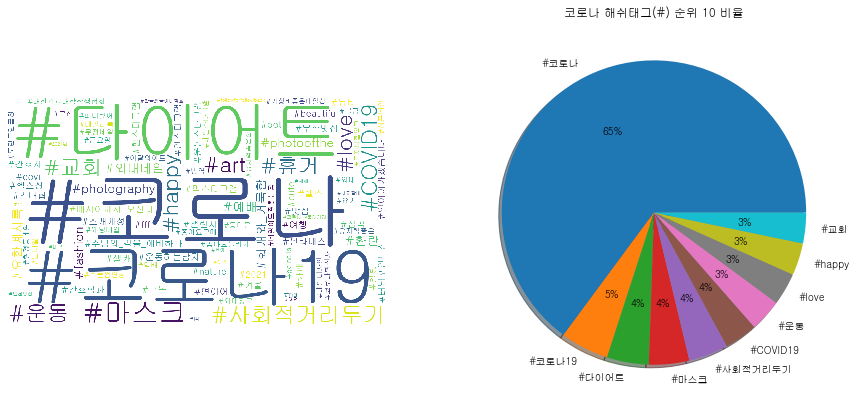

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform
from matplotlib import font_manager, rc
import sys

if platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/gulim.ttc"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "c:/Users/$USER/Library/Fonts/AppleGothic.ttf"

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

wordcloud = WordCloud(font_path= font_path,
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.2,
                    width = 1000,
                    height = 600)
wordcloud.generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,8))

plt_word = plt.subplot(1,2,1)
plt_word.imshow(wordcloud)
plt_word.axis('off')
plt.savefig(path+"\hashtag_wordcloud")

tag_common = tag_counts.most_common(10)

pie_label = []
pie_value = []
for i in range(10):
    pie_label.append(tag_common[i][0])
for i in range(10):
    pie_value.append(tag_common[i][1])
explode = (0,0,0,0,0,0,0,0,0,0)

plt_pie = plt.subplot(1,2,2)
plt_pie.pie(pie_value, explode=explode, labels=pie_label, autopct="%.0f%%", shadow=True)
# plt_pie.setp(plt_pie, fontproperties=fontprop)
plt_pie.set_title("코로나 해쉬태그(#) 순위 10 비율")
plt.show()
